In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_read = pd.read_csv('PbPbCE_residue',index_col=0)
    df_read.head()

Loading data from file


In [25]:
df_read

,residue,name,obs,tl_training_n
0,-1.697776,TL,dNch_deta[0 5],47
1,0.450268,TL,dNch_deta[0 5],47
2,0.519453,TL,dNch_deta[0 5],47
3,-1.271797,TL,dNch_deta[0 5],47
4,-2.370533,TL,dNch_deta[0 5],47
...,...,...,...,...
17195,0.135391,GP,v22[60 70],473
17196,-1.190963,GP,v22[60 70],473
17197,-0.333202,GP,v22[60 70],473
17198,0.004432,GP,v22[60 70],473


In [26]:
#sns.set_context("notebook")

In [27]:
#plot=sns.violinplot(data=df_read[df_read["hf_training_n"]==485], y="obs", x="residue", hue = "name", split=True, orient="h")
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


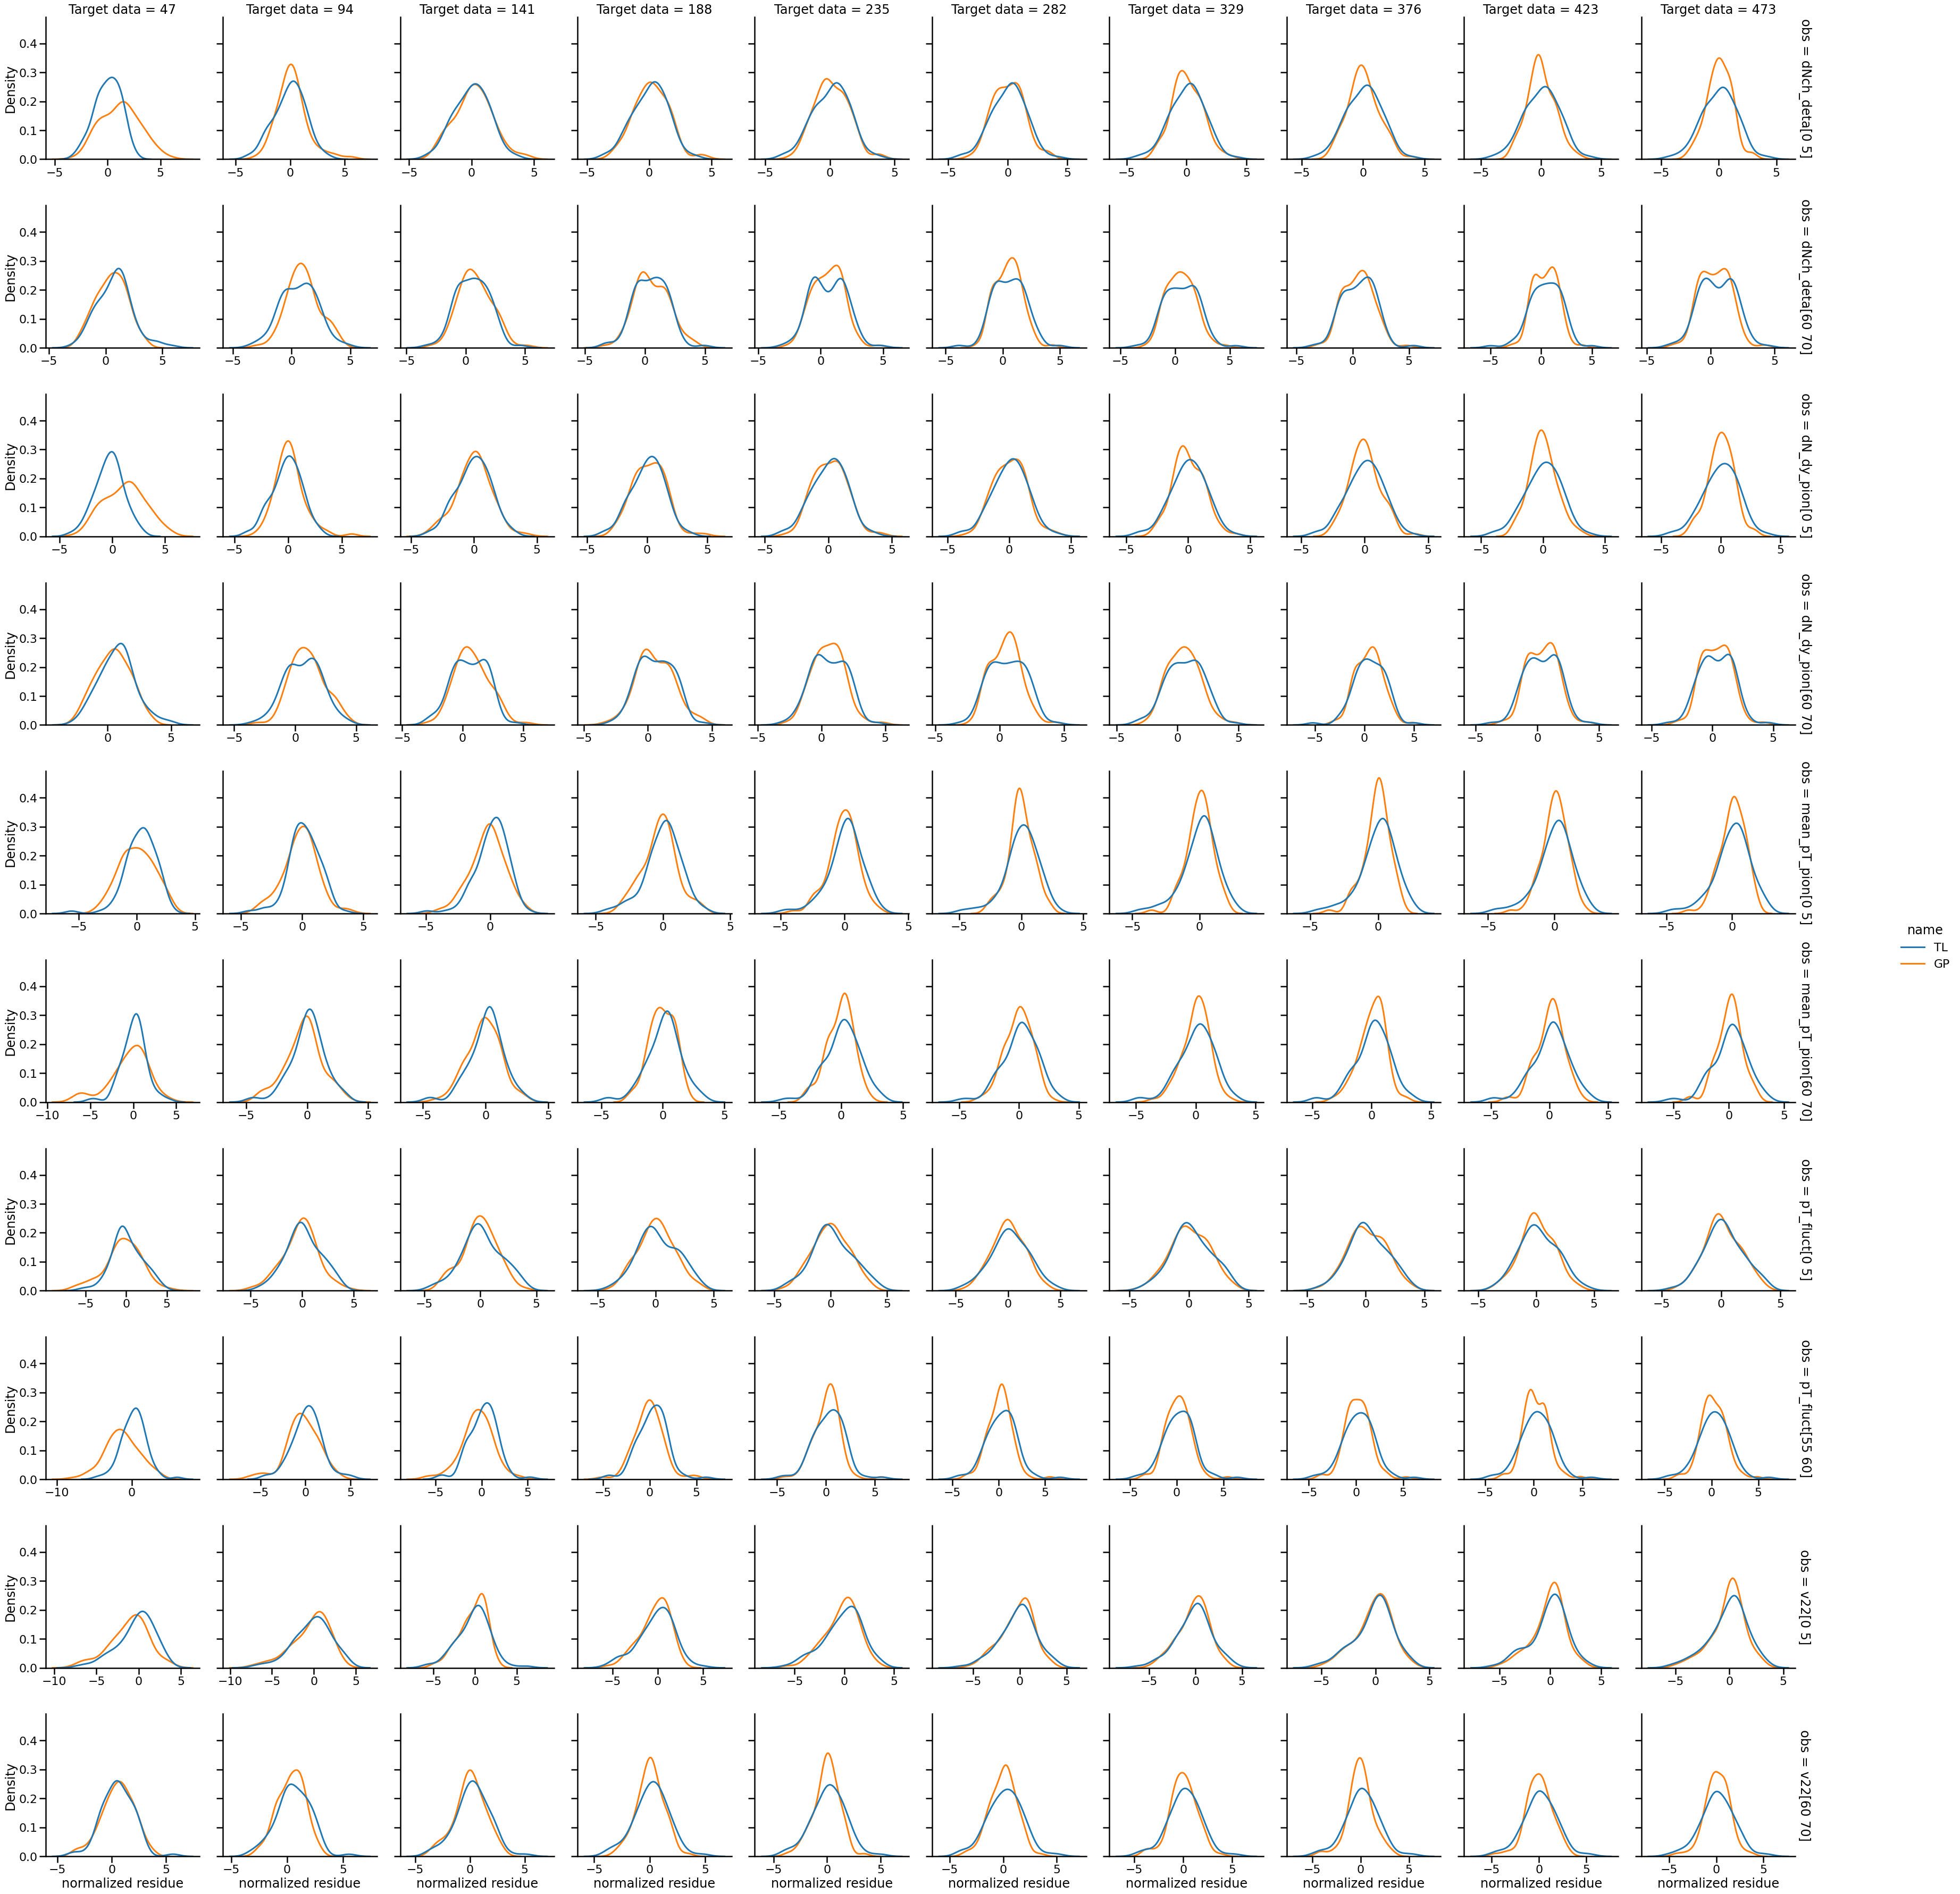

In [28]:
sns.set_context("poster")
df_read.rename(columns={'tl_training_n':'Target data','residue':'normalized residue'}, inplace=True)
plot2= sns.displot(df_read, kind="kde", x="normalized residue", col='Target data', row="obs", hue="name",
                  common_norm=False, facet_kws=dict(margin_titles=True,sharex=False))
#plot2.set(xlabel='normalized residue')
#axes = plot2.axes.flatten()
#for ax in axes:
#    ax.set_title("Training points from target")

#plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')





In [29]:
axes = plot2.fig.axes
from scipy import stats                                                         
xx = np.arange(-4, +4, 0.001)                                                   
yy = stats.norm.pdf(xx)                                                         


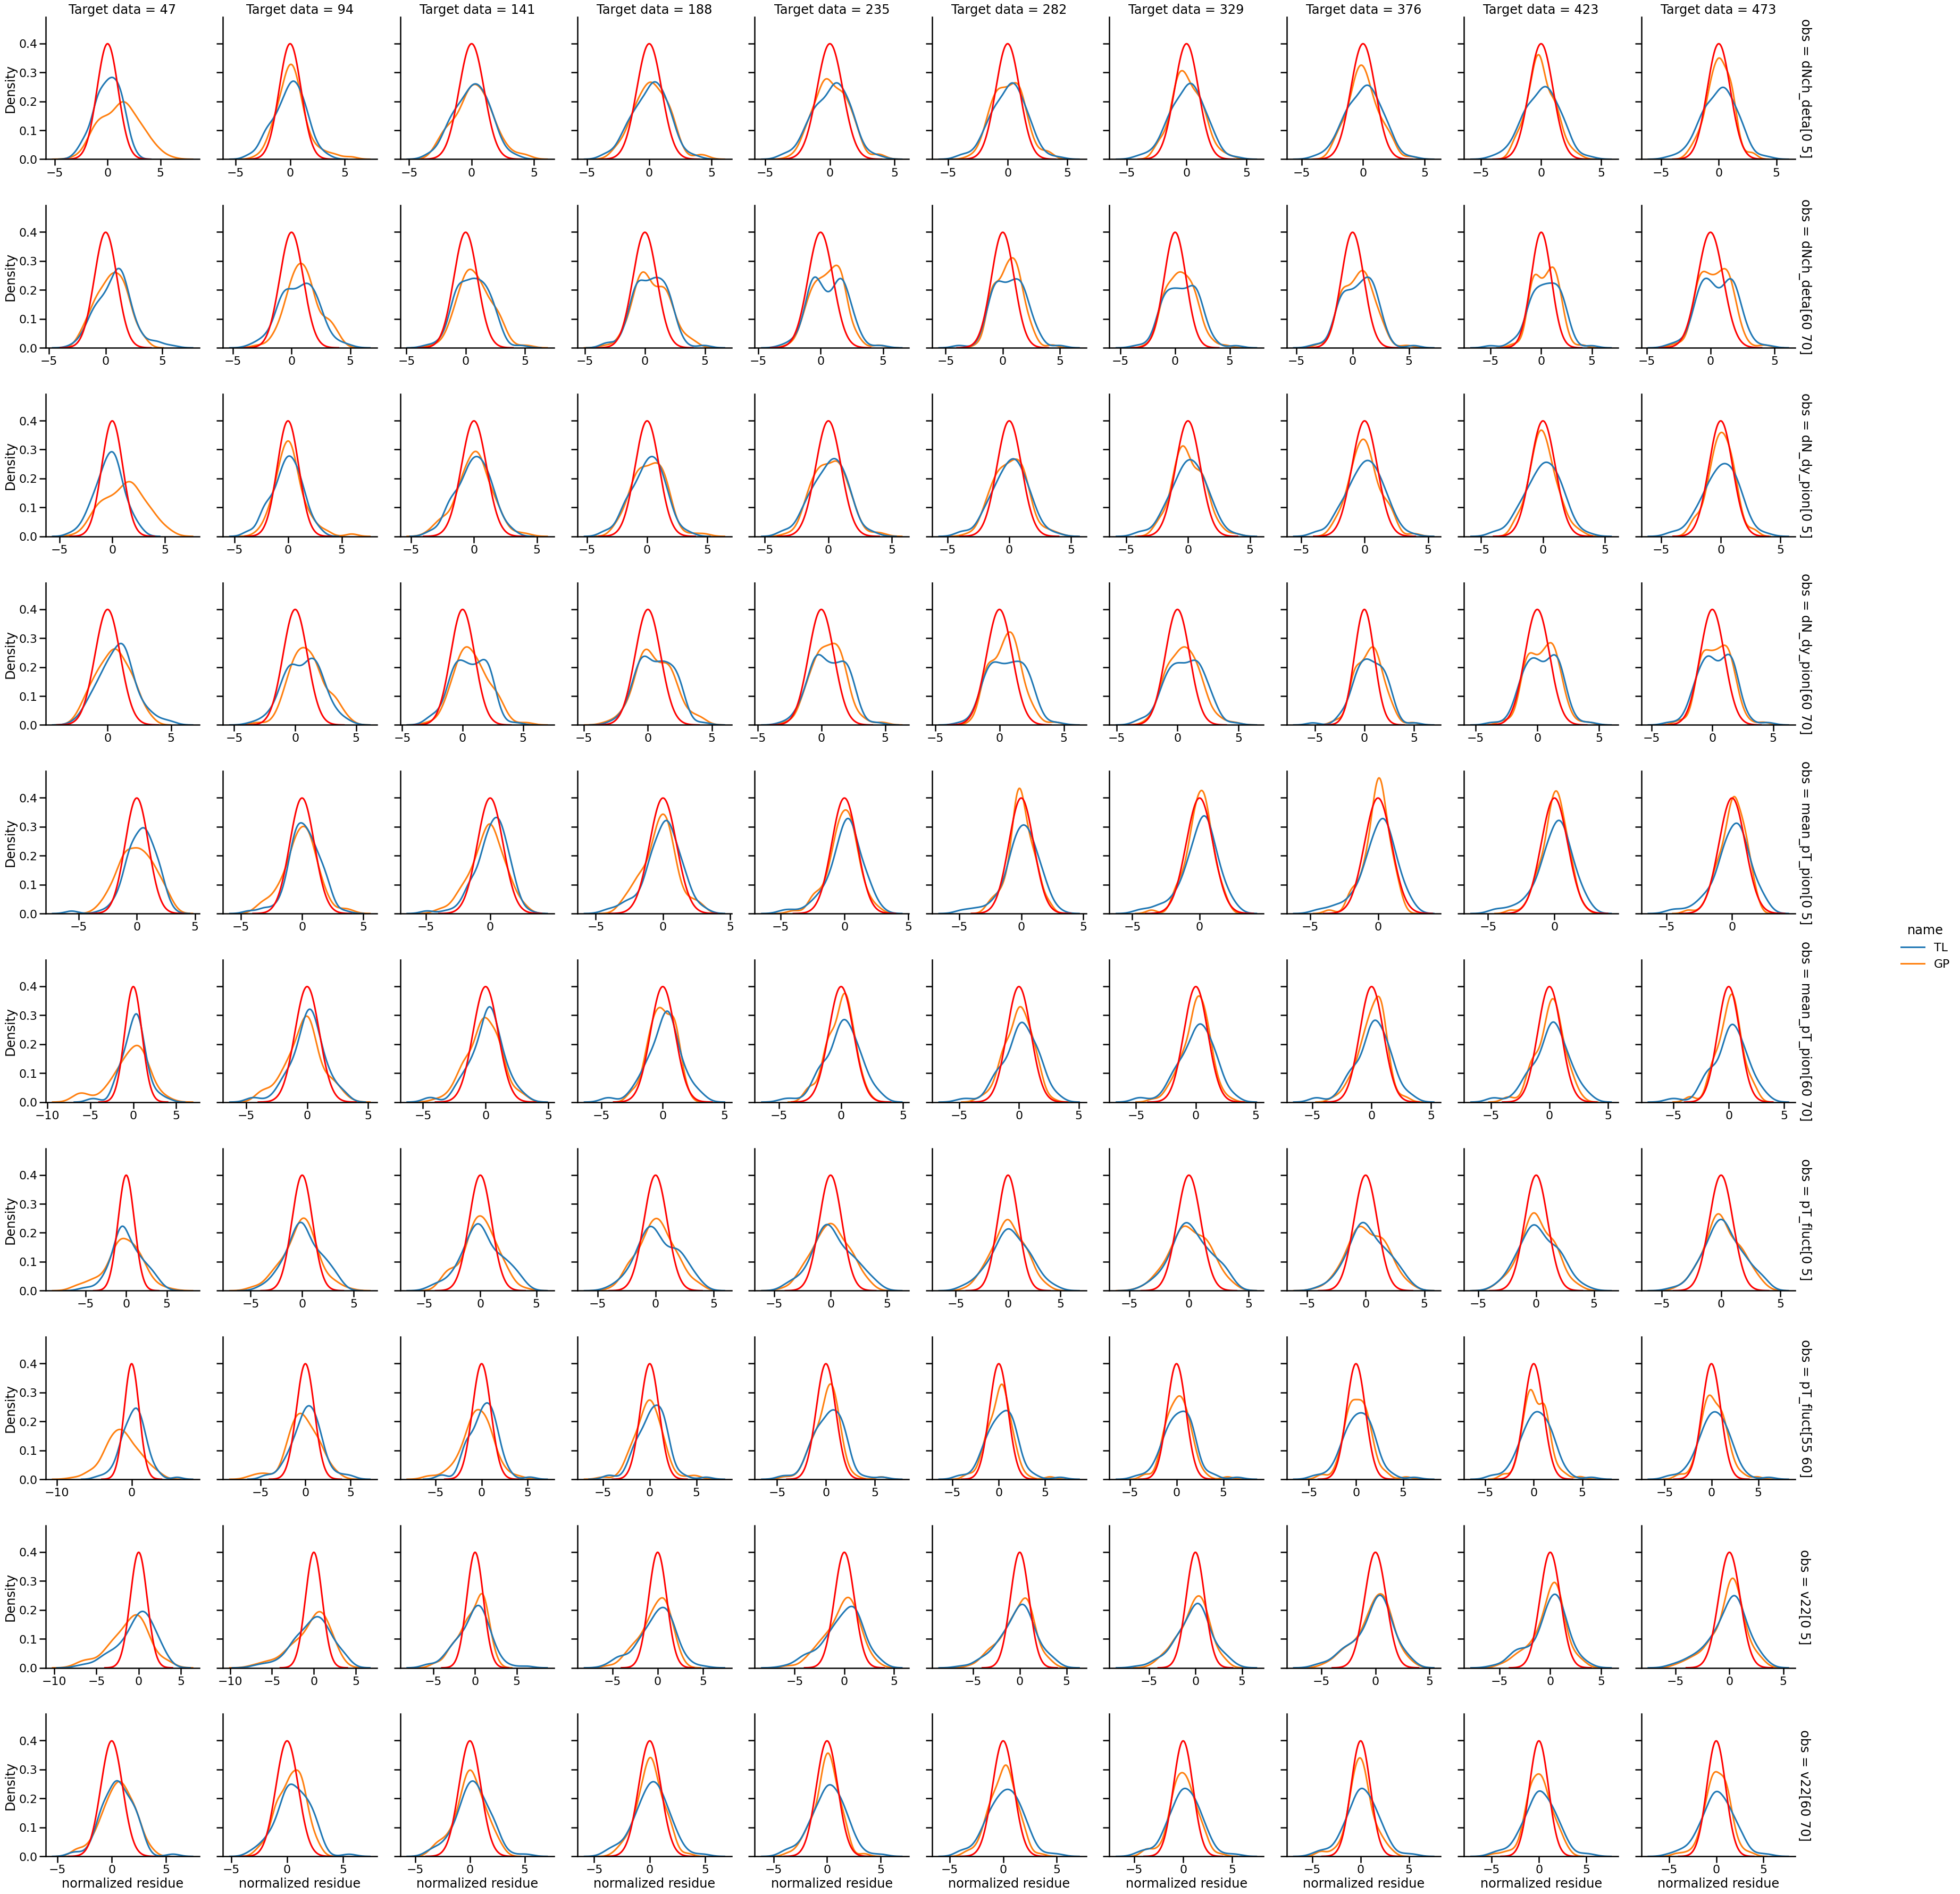

In [30]:
for i, ax in enumerate(axes):
    sns.lineplot(ax=ax,x=xx, y=yy, label="Standard Normal dist", legend=False, color='red')
plot2.savefig("PbPbCE_norm_residue.png", dpi=100)
plot2.fig


    #plt.legend(loc='upper left', labels=['TL', 'GP','Normal'])

In [31]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_res = pd.read_csv('PbPbCE',index_col=0)
df_res.head()

Loading data from file


,observable,fold,n_training,r2_lin_tl,r2_stand_GP,mse_lin_tl,mse_stand_GP,wn_lin_tl,wn_stand_GP,rho,mse_lin_mf,r2_lin_mf,wn_lin_mf_0,wn_lin_mf_1
0,dNch_deta[0 5],0,47,NaN,0.787819,NaN,0.209274,NaN,0.005870,1.064928,0.024221,0.975443,0.006799,0.002542
1,dNch_deta[0 5],0,94,NaN,0.955956,NaN,0.043440,NaN,0.004212,0.969186,0.023765,0.975905,0.006799,0.002486
2,dNch_deta[0 5],0,141,NaN,0.954007,NaN,0.045363,NaN,0.005101,0.973634,0.022292,0.977398,0.006799,0.002570
3,dNch_deta[0 5],0,188,NaN,0.957924,NaN,0.041499,NaN,0.008265,0.975497,0.022446,0.977242,0.006799,0.002620
4,dNch_deta[0 5],0,235,NaN,0.964245,NaN,0.035265,NaN,0.007005,0.986326,0.021499,0.978203,0.006799,0.002409


In [32]:
df_gp_mse = df_res[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse['name'] = 'GP'
df_gp_mse.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.787819,0.209274,GP
1,dNch_deta[0 5],0,94,0.955956,0.043440,GP
2,dNch_deta[0 5],0,141,0.954007,0.045363,GP
3,dNch_deta[0 5],0,188,0.957924,0.041499,GP
4,dNch_deta[0 5],0,235,0.964245,0.035265,GP


In [33]:
df_tl_mse = df_res[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse['name'] = 'TL'
df_tl_mse.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.975443,0.024221,TL
1,dNch_deta[0 5],0,94,0.975905,0.023765,TL
2,dNch_deta[0 5],0,141,0.977398,0.022292,TL
3,dNch_deta[0 5],0,188,0.977242,0.022446,TL
4,dNch_deta[0 5],0,235,0.978203,0.021499,TL


In [34]:
df_all = pd.concat([df_tl_mse,df_gp_mse],axis=0)

In [35]:
df_all.head()

,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.975443,0.024221,TL
1,dNch_deta[0 5],0,94,0.975905,0.023765,TL
2,dNch_deta[0 5],0,141,0.977398,0.022292,TL
3,dNch_deta[0 5],0,188,0.977242,0.022446,TL
4,dNch_deta[0 5],0,235,0.978203,0.021499,TL


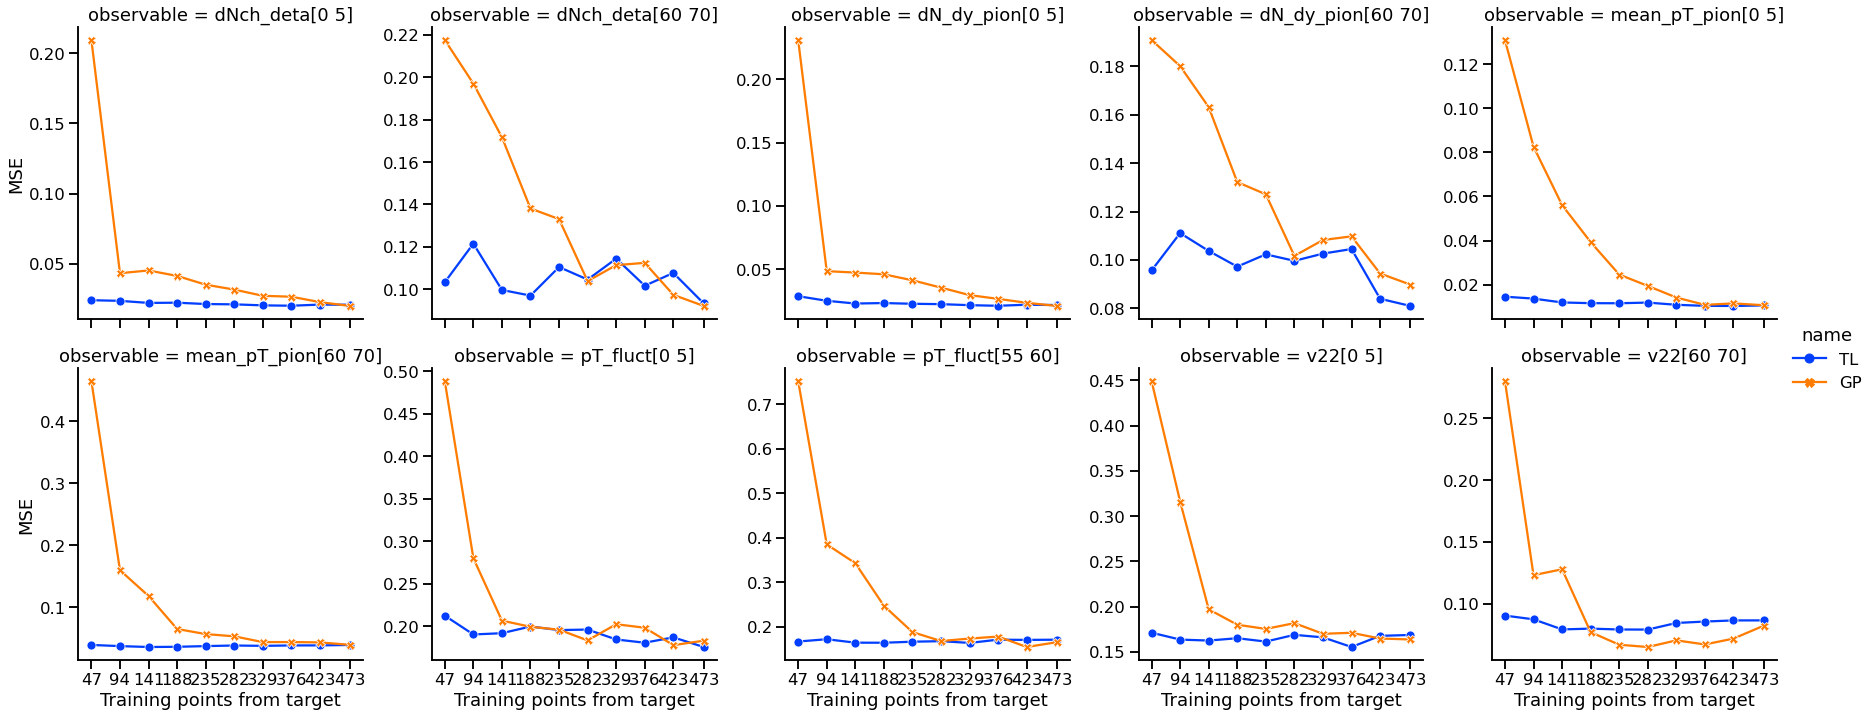

In [36]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",col="observable", kind='line', col_wrap=5,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
#g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("PbPbCE_all_observables_MSE.png", dpi=100)
#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

In [37]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_small = pd.read_csv('multifidelity_viscous_models_PbPb2760_Grad_CE_small',index_col=0)
df_small.head()

Loading data from file


,observable,fold,n_training,r2_lin_mf,r2_stand_GP,mse_lin_mf,mse_stand_GP,wn_lin_mf,wn_stand_GP,rho
0,dNch_deta[0 5],1,3,0.915363,-0.505466,0.042794,0.761183,1.990112e-13,5.562685e-309,1.143273
1,dNch_deta[0 5],1,6,0.974868,-1.826425,0.012707,1.429078,4.061246e-47,5.562685e-309,0.956452
2,dNch_deta[0 5],1,18,0.973680,0.409626,0.013307,0.298501,5.763077e-44,5.562685e-309,0.993127
3,dNch_deta[0 5],1,30,0.976135,0.702879,0.012066,0.150228,1.062413e-48,5.562685e-309,0.982821
4,dNch_deta[60 70],1,3,0.601139,-0.406884,0.172891,0.609829,4.265578e-02,5.562685e-309,1.546137


In [38]:
df_gp_mse_sm = df_small[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse_sm['name'] = 'GP'
df_gp_mse_sm.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse_sm.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],1,3,-0.505466,0.761183,GP
1,dNch_deta[0 5],1,6,-1.826425,1.429078,GP
2,dNch_deta[0 5],1,18,0.409626,0.298501,GP
3,dNch_deta[0 5],1,30,0.702879,0.150228,GP
4,dNch_deta[60 70],1,3,-0.406884,0.609829,GP


In [39]:
df_tl_mse_sm = df_small[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse_sm['name'] = 'TL'
df_tl_mse_sm.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse_sm.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],1,3,0.915363,0.042794,TL
1,dNch_deta[0 5],1,6,0.974868,0.012707,TL
2,dNch_deta[0 5],1,18,0.973680,0.013307,TL
3,dNch_deta[0 5],1,30,0.976135,0.012066,TL
4,dNch_deta[60 70],1,3,0.601139,0.172891,TL


In [40]:
df_all_sm = pd.concat([df_tl_mse_sm,df_gp_mse_sm],axis=0)
df_all_sm.head()

,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],1,3,0.915363,0.042794,TL
1,dNch_deta[0 5],1,6,0.974868,0.012707,TL
2,dNch_deta[0 5],1,18,0.973680,0.013307,TL
3,dNch_deta[0 5],1,30,0.976135,0.012066,TL
4,dNch_deta[60 70],1,3,0.601139,0.172891,TL


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


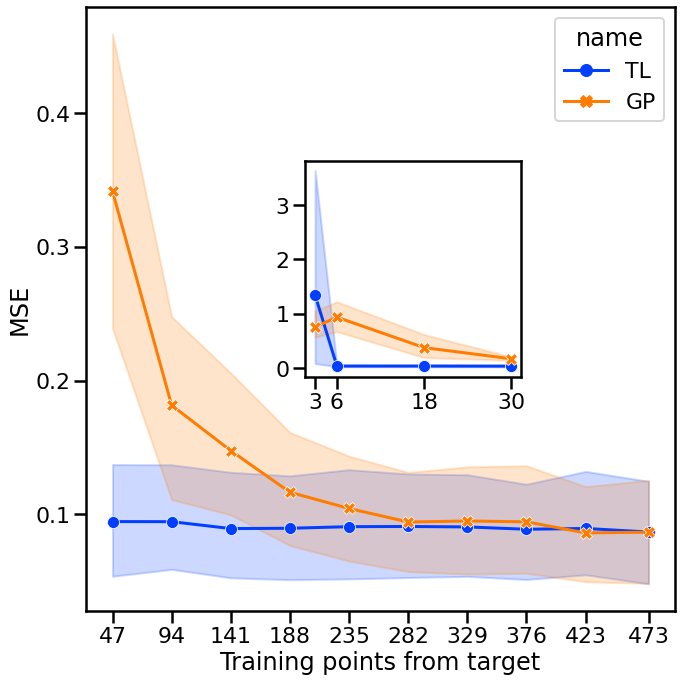

In [41]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged MSE')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')

#s = np.arange(0.0, 10.0, 0.001)
a = plt.axes([.45, .45, .3, .3])
axmin = sns.lineplot(data=df_all_sm.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False, legend=False)
axmin.set(xlabel =None, ylabel = None, xticks=np.unique(df_all_sm['n_training']))
plt.tight_layout()
plt.savefig("PbPbCE_averaged_MSE.png", dpi=100)

#plt.title('Probability')
#plt.xticks([])
#plt.yticks([])

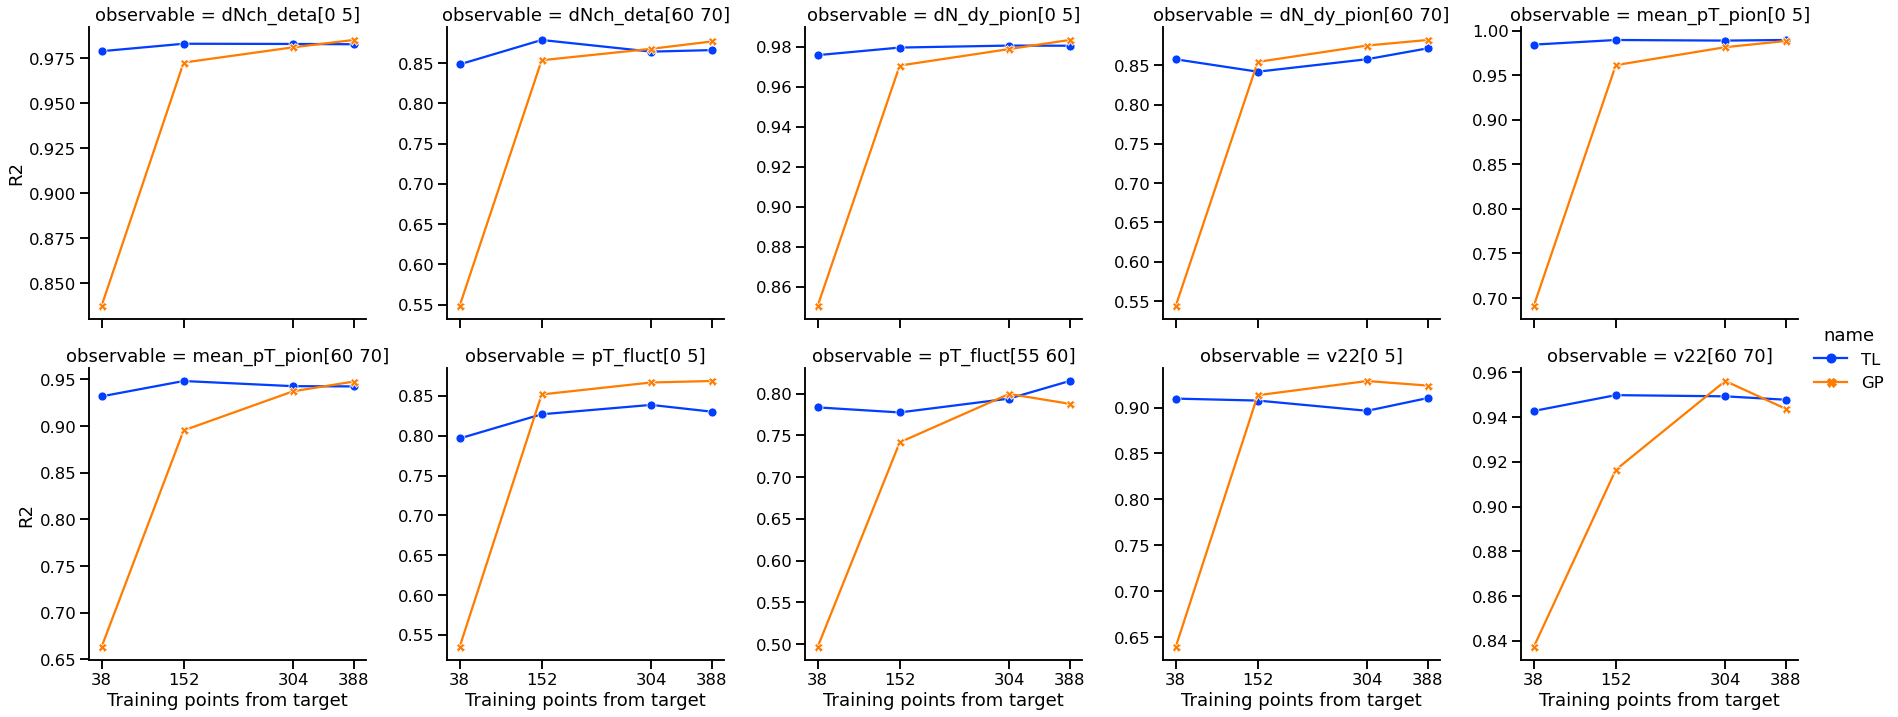

In [20]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue="name",style='name', col="observable", kind='line', col_wrap=5,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.savefig("PbPbCE_all_observables_R2.png", dpi=100)

#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


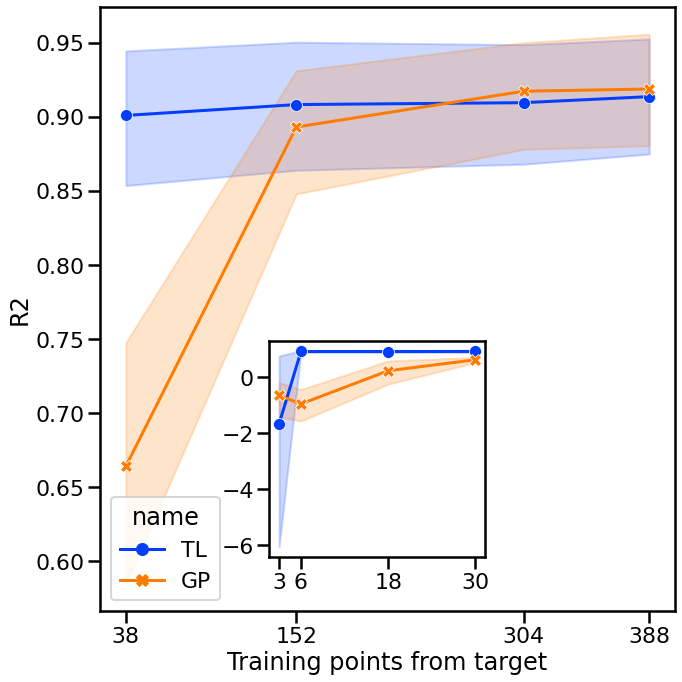

In [21]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged R2')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')

a = plt.axes([.4, .2, .3, .3])
axmin = sns.lineplot(data=df_all_sm.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False, legend=False)
axmin.set(xlabel =None, ylabel = None, xticks=np.unique(df_all_sm['n_training']))
plt.tight_layout()
plt.savefig("PbPbCE_averaged_R2.png", dpi=100)
